In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [9, 6]

import sys
sys.path.append("../derrom/")


import derrom

In [2]:
trajectories = derrom.utils.load_trajectories(filename='../../trajectories_n_kmax=200.npz')

n_trajectories = len(trajectories)
n_kmax = trajectories[0].shape[1]

print(n_trajectories, 'loaded with n_kmax =', n_kmax)

test_trajectory = derrom.utils.load_trajectories(filename='../../example_trajectory.npz')[0]
print('example trajectory loaded with shape: ', test_trajectory.shape)

1000 loaded with n_kmax = 200
example trajectory loaded with shape:  (400, 200)


In [3]:
import random

n_train_traj = [10,20,50,100,200,500,1000]
# n_train_traj = [10]

scores_list = []

for n in n_train_traj:
    
    print('training set size:', n)
    
    batches = n_trajectories//n
    
    print('number of batches:', batches)
    
    tmp_scores = []
    
    for b in range(batches):
        
#         train_traj = random.sample(trajectories,n)
        train_traj = trajectories[b*n:(b+1)*n]

        dim_reducer = derrom.dim_reducers.SVD()

    #     scaler = derrom.scalers.normalize_scaler(0.1)
        scaler = derrom.scalers.standardize_scaler(1.0)

    #     transformer = derrom.transformers.polynomial_features(order=2)
        transformer = derrom.transformers.ELM_features(ELM_nodes=400)

        optimizer = derrom.optimizers.ridge(alpha=10.**-2.0)

        model = derrom.derrom(train_traj, 'AR', DE_l=2, intercept=True, full_hist=False,
                              optimizer=optimizer,
                              scaler=scaler,
                              dim_reducer=dim_reducer,
                              NL_transformer=transformer)

        train_kwargs = {'rdim':15}

        scores = derrom.utils.get_KFold_CV_scores(model, train_traj, folds=10, seed=817, norms=['rms','max'], train_kwargs=train_kwargs)

        print('rms error: ', str(np.mean(scores[0])) + ' +- ' + str(np.std(scores[0])) )
        print('max error: ', str(np.mean(scores[1])) + ' +- ' + str(np.std(scores[1])) )
        
        tmp_scores.append(np.asarray(scores))

    tmp_scores = np.concatenate(tmp_scores,axis=1)
    print(tmp_scores.shape)
    
    scores_list.append(tmp_scores)

training set size: 10
number of batches: 100
rms error:  0.12083513827205086 +- 0.04224875769569385
max error:  0.42366578906002506 +- 0.07745809681682243
rms error:  0.21254392806061734 +- 0.10495719529149669
max error:  0.656621463414168 +- 0.15411795345311705
rms error:  0.17332873951139482 +- 0.0593521507407952
max error:  0.5261602090932631 +- 0.14103103175826853
rms error:  0.15915824678369767 +- 0.03921117366085364
max error:  0.5555557204852297 +- 0.18291139813327467
rms error:  0.1773225556312536 +- 0.04973947207469492
max error:  0.6347018727609555 +- 0.1744609131480297
rms error:  0.1421445201876223 +- 0.02779049303611562
max error:  0.49048345327676157 +- 0.16551535628723427
rms error:  0.17559048319725787 +- 0.06660383160293556
max error:  0.9935699093189381 +- 0.6846404820522539
rms error:  0.1607715655762902 +- 0.08001115063244059
max error:  0.5225834926573045 +- 0.16997717155884007
rms error:  0.19013870328589252 +- 0.044704492792478324
max error:  0.6453162969782036 +

rms error:  0.1547063282234798 +- 0.03242212603897882
max error:  0.5390164355126802 +- 0.09740076823989736
rms error:  0.18054618372446543 +- 0.09392863596364398
max error:  0.5522249109310542 +- 0.2131262551532366
rms error:  0.12878992891796767 +- 0.046498662148843774
max error:  0.46494121886001805 +- 0.11367568280798805
rms error:  0.15903394248720382 +- 0.05807248252207595
max error:  0.6019257210592024 +- 0.15648470078348595
rms error:  0.15741170955058675 +- 0.04425874556910552
max error:  0.6078234328670228 +- 0.1547466957779415
rms error:  0.13414177575134795 +- 0.061894358744419294
max error:  0.49296212610185874 +- 0.12221921525949324
rms error:  0.2125660250359851 +- 0.05753750984374379
max error:  0.6873932293956003 +- 0.2580670537490136
rms error:  0.1295279763707009 +- 0.046225189414622385
max error:  0.5097166896331912 +- 0.14405412410217544
rms error:  0.14587756949227254 +- 0.06638975809164929
max error:  0.6254389324983874 +- 0.31654731672377007
rms error:  0.182510

rms error:  0.042174285417184355 +- 0.03937048030022718
max error:  0.14645943652227544 +- 0.11817840548244908
rms error:  0.05597922572443637 +- 0.03948103617821458
max error:  0.188332233995987 +- 0.1103385413487328
rms error:  0.035429420156343726 +- 0.027112252303946108
max error:  0.13471579379397763 +- 0.09459857983642067
rms error:  0.03932588757149051 +- 0.0325611384543666
max error:  0.13670879387081658 +- 0.09951084221888219
rms error:  0.03933222880946039 +- 0.03510349876451608
max error:  0.14125026367200844 +- 0.09901282480540917
rms error:  0.05026827187793088 +- 0.035988144843373315
max error:  0.1883021450010719 +- 0.135493930713218
rms error:  0.046542798149061176 +- 0.04147017391388159
max error:  0.16495672639654976 +- 0.11442473267547489
rms error:  0.03614655196473808 +- 0.0238847621052386
max error:  0.13753703390622768 +- 0.07834819690280254
rms error:  0.037513890983131584 +- 0.0310919203095241
max error:  0.12779336655989731 +- 0.08735100103944275
rms error:  0

In [4]:
rms_mean = [np.mean(scrs[0]) for scrs in scores_list ]
rms_std  = [np.std(scrs[0]) for scrs in scores_list ]

max_mean = [np.mean(scrs[1]) for scrs in scores_list ]
max_std  = [np.std(scrs[1]) for scrs in scores_list ]

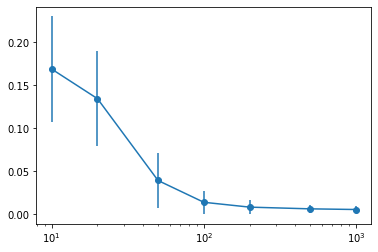

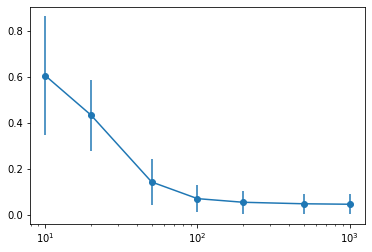

In [5]:
plt.errorbar(n_train_traj, rms_mean, yerr=rms_std, marker = 'o')
plt.xscale('log')
plt.show()

plt.errorbar(n_train_traj, max_mean, yerr=max_std, marker = 'o')
plt.xscale('log')
plt.show()

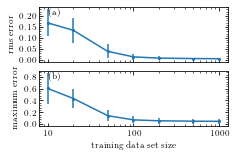

In [25]:
####################################################
####################################################
####################################################

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif"
})

from matplotlib import gridspec
import matplotlib.ticker as ticker

fs = 9
fig = plt.figure(figsize=(3.40457,2.))
plt.rcParams.update({'font.size': fs})
gs = gridspec.GridSpec(nrows=2, ncols=1, width_ratios=[1], height_ratios=[1,1])




####################################################
####################################################
####################################################


ax00 = plt.subplot(gs[0,0])

# plt.grid()

plt.errorbar(n_train_traj, rms_mean, yerr=rms_std, marker = 'o', ms=2)
plt.xscale('log')

# plt.xlabel(r'training data set size')
plt.ylabel(r'rms error')

ax00.xaxis.set_ticks_position('both')
ax00.yaxis.set_ticks_position('both')
ax00.tick_params(which='both', direction='in', color='k')

# ax00.xaxis.set_major_locator(ticker.MultipleLocator(0.01))
# ax00.xaxis.set_minor_locator(ticker.MultipleLocator(0.002))
ax00.xaxis.set_major_formatter(ticker.NullFormatter())
ax00.xaxis.set_minor_formatter(ticker.NullFormatter())

ax00.yaxis.set_major_locator(ticker.MultipleLocator(0.05))
ax00.yaxis.set_minor_locator(ticker.MultipleLocator(0.01))
#ax00.yaxis.set_major_formatter(ticker.NullFormatter())
#ax00.yaxis.set_minor_formatter(ticker.NullFormatter())

plt.text(0.05, 0.97,r'(a)', horizontalalignment='left', verticalalignment='top', transform=ax00.transAxes)

####################################################
####################################################
####################################################


ax00 = plt.subplot(gs[1,0])

# plt.grid()

plt.errorbar(n_train_traj, max_mean, yerr=max_std, marker = 'o', ms=2)
plt.xscale('log')

plt.xlabel(r'training data set size')
plt.ylabel(r'maximum error')

ax00.xaxis.set_ticks_position('both')
ax00.yaxis.set_ticks_position('both')
ax00.tick_params(which='both', direction='in', color='k')

ax00.xaxis.set_major_locator(ticker.FixedLocator([10,100,1000]))
ax00.xaxis.set_major_formatter(ticker.FixedFormatter([10,100,1000]))

# ax00.xaxis.set_major_locator(ticker.MultipleLocator(0.05))
# ax00.xaxis.set_minor_locator(ticker.MultipleLocator(0.01))
# ax00.xaxis.set_major_formatter(ticker.NullFormatter())
# ax00.xaxis.set_minor_formatter(ticker.NullFormatter())

ax00.yaxis.set_major_locator(ticker.MultipleLocator(0.2))
ax00.yaxis.set_minor_locator(ticker.MultipleLocator(0.04))
#ax00.yaxis.set_major_formatter(ticker.NullFormatter())
#ax00.yaxis.set_minor_formatter(ticker.NullFormatter())

plt.text(0.05, 0.97,r'(b)', horizontalalignment='left', verticalalignment='top', transform=ax00.transAxes)

####################################################
####################################################
####################################################



plt.tight_layout()

plt.subplots_adjust(left=0.13, bottom=0.16, right=0.9, top=0.99, wspace=0.08, hspace=0.15)


plt.savefig('/home/agluedge/Preprints/ELPH/figs/training_data_dependence.pdf')
plt.show()